In [142]:
# -------------------------------- Importações ------------------------------- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [143]:
# ---------------------------- Importando os dados --------------------------- #
df1 = pd.read_csv('dadosConcentracao100.csv', header=None)

df1

,0,1,2
0,0,100,0
1,1,86,7
2,2,84,8
3,3,78,11
4,4,78,11
...,...,...,...
18713,18713,2,49
18714,18714,2,49
18715,18715,2,49
18716,18716,2,49


In [144]:
# ------------------------- Igualando as porcentagens ------------------------ #
eixo_x = np.array(df1.iloc[1:18716, 0].tolist(), dtype=np.float128)

eixo_y1 = np.array(df1.iloc[1:18716, 1].tolist(), dtype=np.float128)
eixo_y2 = df1.iloc[1:18716, 2].tolist()

eixo_y2c = []

for i in eixo_y2:
    c = i*2
    eixo_y2c.append(c)
    
eixo_y2 = np.array(eixo_y2c, dtype=np.float128)

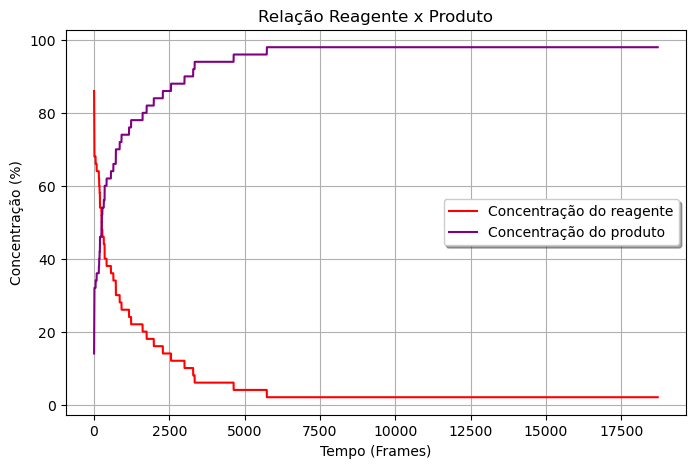

In [145]:
# ---------------------- Plotando os dados da simulação ---------------------- #
plt.figure(figsize=(8,5))

plt.title('Relação Reagente x Produto')

plt.xlabel('Tempo (Frames)')
plt.ylabel('Concentração (%)')

plt.plot(eixo_x, eixo_y1, label='Concentração do reagente', color='red')
plt.plot(eixo_x, eixo_y2, label='Concentração do produto', color='purple')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

In [146]:
# --------- Encontrando os parâmetros da função descrita pelos dados --------- #
def exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def log(x, a, b, c):
    return a * np.log(b * x) + c

params1, _ = optimize.curve_fit(exp, eixo_x, eixo_y1)
params2, _ = optimize.curve_fit(log, eixo_x, eixo_y2)

print("Parâmetros do reagente:", params1, "\nParâmetros do produto:",  params2)

Parâmetros do reagente: [5.78193355e+01 7.34870594e-04 2.12254206e+00] 
Parâmetros do produto: [  9.48807181  70.01786247 -30.48740913]


/tmp/ipykernel_57383/2068890303.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


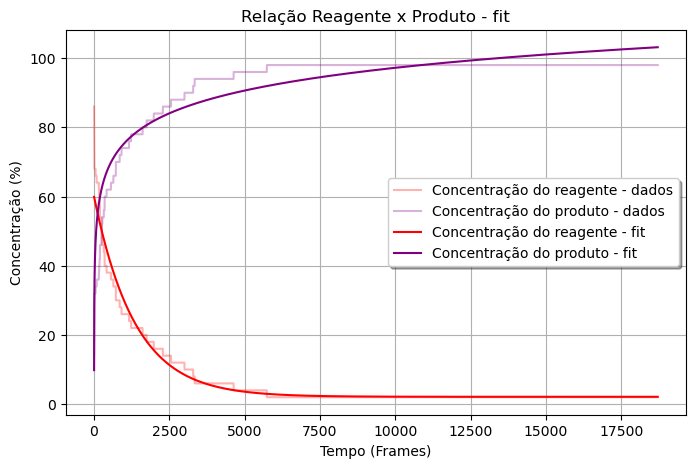

In [147]:
# --------------- Plotando interpolação dos dados da simulação --------------- #
plt.figure(figsize=(8,5))

plt.title('Relação Reagente x Produto - fit')

plt.xlabel('Tempo (Frames)')
plt.ylabel('Concentração (%)')

plt.plot(eixo_x, eixo_y1, label='Concentração do reagente - dados', color='red', alpha=.3)
plt.plot(eixo_x, eixo_y2, label='Concentração do produto - dados', color='purple', alpha=.3)

plt.plot(eixo_x, exp(eixo_x, *params1), label="Concentração do reagente - fit", color='red')
plt.plot(eixo_x, log(eixo_x, *params2), label="Concentração do produto - fit", color='purple')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 